<a href="https://colab.research.google.com/github/tkryu91/drive/blob/main/hades_sub5_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
url_train = "https://raw.githubusercontent.com/ZeusKwon/data-drive/main/%EC%A3%BC%EC%B0%A8%EC%88%98%EC%9A%94/train.csv"
url_test = "https://raw.githubusercontent.com/ZeusKwon/data-drive/main/%EC%A3%BC%EC%B0%A8%EC%88%98%EC%9A%94/test.csv"
url_submission = "https://raw.githubusercontent.com/ZeusKwon/data-drive/main/%EC%A3%BC%EC%B0%A8%EC%88%98%EC%9A%94/sample_submission.csv"
urlinfo = 'https://raw.githubusercontent.com/ZeusKwon/data-drive/main/%EC%A3%BC%EC%B0%A8%EC%88%98%EC%9A%94/age_gender_info.csv'


train = pd.read_csv(url_train)
test = pd.read_csv(url_test)
submission = pd.read_csv(url_submission)

In [3]:
train.head()

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
0,C2483,900,아파트,경상북도,국민임대,39.72,134,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
1,C2483,900,아파트,경상북도,국민임대,39.72,15,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
2,C2483,900,아파트,경상북도,국민임대,51.93,385,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
3,C2483,900,아파트,경상북도,국민임대,51.93,15,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
4,C2483,900,아파트,경상북도,국민임대,51.93,41,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0


In [4]:
# 한글칼럼 깨지는 문제 때문에 한글칼러명을 영어로 변경
train2 = train.rename(columns={'단지코드' : 'id', 
                               '총세대수' : 'no_house',
                              '임대건물구분' : 'bd_type',
                              '지역' : 'state',
                              '공급유형' : 'supply_type',
                              '전용면적' : 'sqm',
                              '전용면적별세대수' : 'house_per_sqm',
                              '공가수' : 'no_empty',
                              '자격유형' : 'q_type',
                              '임대보증금' : 'deposit',
                              '임대료' : 'rent',
                              '도보 10분거리 내 지하철역 수(환승노선 수 반영)' : 'subway',
                              '도보 10분거리 내 버스정류장 수' : 'bus',
                              '단지내주차면수' : 'parkinglot',
                              '등록차량수' : 'cars'})

In [5]:
train2.head()

,id,no_house,bd_type,state,supply_type,sqm,house_per_sqm,no_empty,q_type,deposit,rent,subway,bus,parkinglot,cars
0,C2483,900,아파트,경상북도,국민임대,39.72,134,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
1,C2483,900,아파트,경상북도,국민임대,39.72,15,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
2,C2483,900,아파트,경상북도,국민임대,51.93,385,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
3,C2483,900,아파트,경상북도,국민임대,51.93,15,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
4,C2483,900,아파트,경상북도,국민임대,51.93,41,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0


In [6]:
# 리포트 html로 출력

# import pandas_profiling

# report = train2.profile_report()
# report.to_file('report.html')

In [7]:
# 전용면적을 평수로

def pyeong(x):
    y = x*0.3025
    return y

train3 = train2.copy()

train3['sqp'] = pyeong(train2['sqm']).round()
train3_columns = ['id', 'no_house', 'bd_type', 'state', 'supply_type', 'sqp',
       'house_per_sqm', 'no_empty', 'q_type', 'deposit', 'rent', 'subway',
       'bus', 'parkinglot', 'cars']
train3 = train3[train3_columns]


In [8]:
train3.head()

,id,no_house,bd_type,state,supply_type,sqp,house_per_sqm,no_empty,q_type,deposit,rent,subway,bus,parkinglot,cars
0,C2483,900,아파트,경상북도,국민임대,12.0,134,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
1,C2483,900,아파트,경상북도,국민임대,12.0,15,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
2,C2483,900,아파트,경상북도,국민임대,16.0,385,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
3,C2483,900,아파트,경상북도,국민임대,16.0,15,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
4,C2483,900,아파트,경상북도,국민임대,16.0,41,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0


In [9]:
# 평수의 종류
# 4평은 뭐지?
np.sort(train3.sqp.unique())

array([  4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,  12.,  13.,  14.,
        15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,  23.,  24.,  25.,
        26.,  33.,  38.,  42.,  73.,  75.,  96., 121., 122., 123., 176.])

In [10]:
# 일단 4평은 임대상가
train3[train3.sqp.isin([4])]

,id,no_house,bd_type,state,supply_type,sqp,house_per_sqm,no_empty,q_type,deposit,rent,subway,bus,parkinglot,cars
101,C1874,619,상가,충청남도,임대상가,4.0,1,2.0,D,NaN,NaN,NaN,2.0,97.0,62.0
219,C2258,965,상가,대전광역시,임대상가,4.0,1,13.0,D,NaN,NaN,NaN,3.0,287.0,78.0
245,C2038,785,상가,대전광역시,임대상가,4.0,1,7.0,D,NaN,NaN,1.0,10.0,150.0,108.0
320,C2190,1013,상가,경상남도,임대상가,4.0,1,7.0,D,NaN,NaN,0.0,2.0,178.0,129.0
371,C2135,1116,상가,부산광역시,임대상가,4.0,1,10.0,D,NaN,NaN,1.0,3.0,262.0,127.0
391,C2034,1486,상가,부산광역시,임대상가,4.0,1,2.0,D,NaN,NaN,1.0,3.0,405.0,132.0
767,C1004,521,상가,충청남도,임대상가,4.0,1,3.0,D,NaN,NaN,NaN,2.0,153.0,93.0
786,C1875,1003,상가,충청남도,임대상가,4.0,1,5.0,D,NaN,NaN,NaN,8.0,192.0,209.0


In [11]:
# 평수별로 공급유형을 확인해보자
# 4평 = 임대상가
# 33평 이상 = 임대상가
train3.groupby('sqp')['supply_type'].unique()

sqp
4.0                                             [임대상가]
5.0                                       [임대상가, 행복주택]
6.0                                       [임대상가, 행복주택]
7.0                     [임대상가, 장기전세, 영구임대, 국민임대, 행복주택]
8.0                           [영구임대, 임대상가, 국민임대, 행복주택]
9.0                           [국민임대, 영구임대, 임대상가, 행복주택]
10.0                          [국민임대, 임대상가, 영구임대, 행복주택]
11.0                     [국민임대, 공공임대(50년), 임대상가, 행복주택]
12.0     [국민임대, 공공임대(50년), 영구임대, 임대상가, 공공임대(5년), 행복주택]
13.0                     [국민임대, 공공임대(50년), 임대상가, 행복주택]
14.0                [국민임대, 임대상가, 장기전세, 공공임대(5년), 행복주택]
15.0                [공공임대(50년), 임대상가, 국민임대, 공공임대(10년)]
16.0     [국민임대, 영구임대, 임대상가, 공공임대(10년), 장기전세, 공공임대(분납)]
17.0                           [임대상가, 국민임대, 공공임대(10년)]
18.0       [국민임대, 공공임대(10년), 장기전세, 공공임대(분납), 공공임대(5년)]
19.0                                            [임대상가]
20.0                                       [공공임대(10년)]
21.0                                       [공공임대(10년)]
22.0  

In [12]:
# 자격유형 : 비공개지만, 재산과 관련이 있을까? 임대료, 임대보증금과의 관계가 있을 지 분석해보자.


In [13]:
train3['deposit'] = pd.to_numeric(train3['deposit'], errors='coerce')
train3['rent'] = pd.to_numeric(train3['rent'], errors='coerce')

In [14]:
pd.set_option('display.float_format', lambda x : '%.5f' % x)
q_type_group_dep_rent = train3.groupby(['q_type'])['deposit','rent'].mean()
q_type_group_dep_rent

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,deposit,rent
q_type,,
A,26295295.94670,212942.40513
B,17059619.04762,139732.38095
C,6909410.52632,101283.15789
D,nan,nan
E,91535140.54054,47670.81081
F,4156666.66667,71470.00000
G,13229222.22222,233505.55556
H,27278387.75510,226059.11565
I,9677122.44898,82552.24490


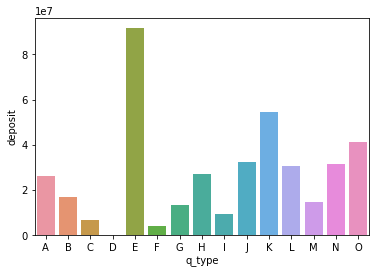

In [15]:
import seaborn as sns
sns.barplot(data = q_type_group_dep_rent, x = q_type_group_dep_rent.index, y = q_type_group_dep_rent['deposit'])
# q_type_group['deposit'].dist()
# sns.distplot(q_type_group['deposit'])

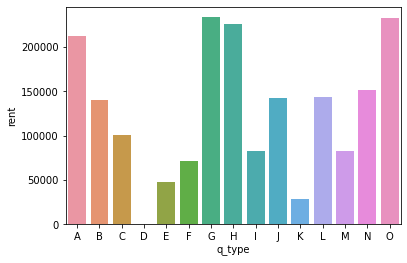

In [16]:
sns.barplot(data = q_type_group_dep_rent, x = q_type_group_dep_rent.index, y = q_type_group_dep_rent['rent'])

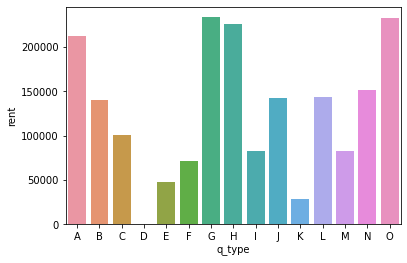

In [17]:
sns.barplot(data = q_type_group_dep_rent, x = q_type_group_dep_rent.index, y = q_type_group_dep_rent['rent'])

In [18]:
# 자격유형과 보증금/임대료 간의 상관관계는 잘 안 보인다.

In [19]:
# 자격유형과 공급유형의 관계는?
train3.groupby(['q_type'])[['supply_type']].nunique()

,supply_type
q_type,
A,7
B,1
C,1
D,2
E,2
F,1
G,1
H,1
I,1


In [20]:
train3.groupby(['q_type'])['supply_type'].unique()

q_type
A    [국민임대, 공공임대(50년), 공공임대(10년), 공공임대(분납), 장기전세, 영...
B                                               [국민임대]
C                                               [영구임대]
D                                         [임대상가, 공공분양]
E                                         [영구임대, 국민임대]
F                                               [영구임대]
G                                               [국민임대]
H                                               [국민임대]
I                                               [영구임대]
J                                               [행복주택]
K                                               [행복주택]
L                                               [행복주택]
M                                               [행복주택]
N                                               [행복주택]
O                                               [행복주택]
Name: supply_type, dtype: object

In [21]:
train3.groupby(['q_type'])['supply_type'].unique()[0]

array(['국민임대', '공공임대(50년)', '공공임대(10년)', '공공임대(분납)', '장기전세', '영구임대',
       '공공임대(5년)'], dtype=object)

In [22]:
# J ~ O는 모두 행복주택인데 하나로 묶어도 될까?

In [23]:
# J ~ O는 모두 행복주택인데 하나로 묶어도 될까?
# J ~ O에 어떤 차이가 있는 지 살펴보자

q_type_JO_list = ['J', 'K', 'L', 'M', 'N', 'O']

q_type_JO = train3[train3['q_type'].isin(q_type_JO_list)] 
q_type_JO

,id,no_house,bd_type,state,supply_type,sqp,house_per_sqm,no_empty,q_type,deposit,rent,subway,bus,parkinglot,cars
2534,C1210,1088,아파트,대구광역시,행복주택,7.00000,85,39.00000,J,19880000.00000,107680.00000,0.00000,4.00000,773.00000,586.00000
2535,C1210,1088,아파트,대구광역시,행복주택,7.00000,57,39.00000,J,19880000.00000,107680.00000,0.00000,4.00000,773.00000,586.00000
2536,C1210,1088,아파트,대구광역시,행복주택,7.00000,498,39.00000,J,20680000.00000,112010.00000,0.00000,4.00000,773.00000,586.00000
2537,C1210,1088,아파트,대구광역시,행복주택,8.00000,76,39.00000,J,24800000.00000,134330.00000,0.00000,4.00000,773.00000,586.00000
2538,C1210,1088,아파트,대구광역시,행복주택,11.00000,372,39.00000,J,33920000.00000,183730.00000,0.00000,4.00000,773.00000,586.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2935,C2586,90,아파트,제주특별자치도,행복주택,8.00000,18,7.00000,J,26000000.00000,110500.00000,0.00000,3.00000,66.00000,57.00000
2936,C2586,90,아파트,제주특별자치도,행복주택,11.00000,36,7.00000,J,36000000.00000,153000.00000,0.00000,3.00000,66.00000,57.00000
2942,C2020,40,아파트,부산광역시,행복주택,5.00000,20,7.00000,L,18000000.00000,87000.00000,1.00000,2.00000,25.00000,19.00000
2943,C2020,40,아파트,부산광역시,행복주택,8.00000,5,7.00000,L,28000000.00000,135330.00000,1.00000,2.00000,25.00000,19.00000


In [24]:
# 일단 지역은 다 섞여있다.
q_type_JO.groupby('q_type')['state'].unique()

q_type
J    [대구광역시, 강원도, 서울특별시, 전라북도, 울산광역시, 제주특별자치도, 전라남도...
K                                    [충청북도, 강원도, 경상남도]
L                      [충청북도, 경상남도, 경기도, 광주광역시, 부산광역시]
M                                              [광주광역시]
N                                   [광주광역시, 전라남도, 경기도]
O                                              [광주광역시]
Name: state, dtype: object

In [25]:
# 자격유형 별 차량 보유 비율 (전체세대 대비 차량보유)
# 차이가 있는 지 잘 모르겠다. J~O를 묶은 것과 묶지 않은 것으로 성능을 비교해보면 어떨까?
q_type_JO['cars_per_house'] = q_type_JO['cars']/q_type_JO['no_house']
q_type_JO.groupby('q_type')['cars_per_house'].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


q_type
J   0.61230
K   0.49266
L   0.60817
M   0.46120
N   0.49412
O   0.46120
Name: cars_per_house, dtype: float64

In [26]:
# 전체 자격 유형의 차량 보유 비율

train3['cars_per_house'] = train3['cars'] / train3['no_house']
train3.groupby('q_type')['cars_per_house'].mean()

q_type
A   0.92490
B   0.84068
C   0.17343
D   0.15770
E   0.74826
F   0.14786
G   0.55408
H   0.79114
I   0.70594
J   0.61230
K   0.49266
L   0.60817
M   0.46120
N   0.49412
O   0.46120
Name: cars_per_house, dtype: float64

In [27]:
# 결측치

In [28]:
train3.isnull().sum()

id                  0
no_house            0
bd_type             0
state               0
supply_type         0
sqp                 0
house_per_sqm       0
no_empty            0
q_type              0
deposit           581
rent              590
subway            211
bus                 4
parkinglot          0
cars                0
cars_per_house      0
dtype: int64

In [29]:
train4 = train3.copy()
train4['subway'].fillna(0, inplace = True)
train4['bus'].fillna(0, inplace = True)

In [30]:
null = train4[train4['rent'].isnull()]
null['q_type'].value_counts()

D    569
A      9
H      8
K      4
Name: q_type, dtype: int64

In [31]:
test[test['임대보증금'].isnull()]['자격유형'].value_counts()

D    180
Name: 자격유형, dtype: int64

In [32]:
null_ahk = null[null['q_type'].isin(['A','H','K'])]
null_ahk

,id,no_house,bd_type,state,supply_type,sqp,house_per_sqm,no_empty,q_type,deposit,rent,subway,bus,parkinglot,cars,cars_per_house
2043,C1397,370,아파트,서울특별시,장기전세,7.00000,51,9.00000,A,87444000.00000,nan,0.00000,3.00000,1590.00000,1595.00000,4.31081
2044,C1397,370,아파트,서울특별시,장기전세,14.00000,4,9.00000,A,174888000.00000,nan,0.00000,3.00000,1590.00000,1595.00000,4.31081
2045,C1397,370,아파트,서울특별시,장기전세,14.00000,69,9.00000,A,174888000.00000,nan,0.00000,3.00000,1590.00000,1595.00000,4.31081
2046,C1397,370,아파트,서울특별시,장기전세,16.00000,24,9.00000,A,194562000.00000,nan,0.00000,3.00000,1590.00000,1595.00000,4.31081
2047,C1397,370,아파트,서울특별시,장기전세,16.00000,80,9.00000,A,194562000.00000,nan,0.00000,3.00000,1590.00000,1595.00000,4.31081
2048,C1397,370,아파트,서울특별시,장기전세,18.00000,142,9.00000,A,216423000.00000,nan,0.00000,3.00000,1590.00000,1595.00000,4.31081
2100,C1039,790,아파트,서울특별시,장기전세,16.00000,126,13.00000,A,187694000.00000,nan,0.00000,3.00000,673.00000,645.00000,0.81646
2101,C1039,790,아파트,서울특별시,장기전세,18.00000,49,13.00000,A,213863000.00000,nan,0.00000,3.00000,673.00000,645.00000,0.81646
2102,C1039,790,아파트,서울특별시,장기전세,18.00000,75,13.00000,A,213863000.00000,nan,0.00000,3.00000,673.00000,645.00000,0.81646
2547,C1326,1934,아파트,부산광역시,국민임대,7.00000,472,43.00000,H,nan,nan,0.00000,4.00000,1670.00000,1153.00000,0.59617


In [33]:
sqp_dep_mean = train4.groupby(['q_type','sqp'])['deposit'].mean()
sqp_rent_mean = train4.groupby(['q_type','sqp'])['rent'].mean()

In [34]:
sqp_rent_mean

q_type  sqp     
A       7.00000    133240.00000
        8.00000    135420.52632
        9.00000    130925.90909
        10.00000   120308.78788
        11.00000   133249.68198
                       ...     
N       8.00000    122158.33333
        11.00000   190085.71429
        13.00000   266000.00000
        14.00000   221360.00000
O       14.00000   233010.00000
Name: rent, Length: 109, dtype: float64

In [35]:
train4.loc[2906, 'deposit']

nan

In [36]:
sqp_rent_mean.loc['A', 7]

133240.0

In [37]:
for i in range(0, len(null_ahk)):
    qt = null_ahk['q_type'].iloc[i]
    sqpn = null_ahk['sqp'].iloc[i]
    null_ahk['deposit'].iloc[i] = sqp_dep_mean.loc[qt, sqpn]
    null_ahk['rent'].iloc[i] = sqp_rent_mean.loc[qt, sqpn]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [38]:
null_ahk

,id,no_house,bd_type,state,supply_type,sqp,house_per_sqm,no_empty,q_type,deposit,rent,subway,bus,parkinglot,cars,cars_per_house
2043,C1397,370,아파트,서울특별시,장기전세,7.00000,51,9.00000,A,47105000.00000,133240.00000,0.00000,3.00000,1590.00000,1595.00000,4.31081
2044,C1397,370,아파트,서울특별시,장기전세,14.00000,4,9.00000,A,24715277.35849,184498.06818,0.00000,3.00000,1590.00000,1595.00000,4.31081
2045,C1397,370,아파트,서울특별시,장기전세,14.00000,69,9.00000,A,24715277.35849,184498.06818,0.00000,3.00000,1590.00000,1595.00000,4.31081
2046,C1397,370,아파트,서울특별시,장기전세,16.00000,24,9.00000,A,29912811.72840,215848.25545,0.00000,3.00000,1590.00000,1595.00000,4.31081
2047,C1397,370,아파트,서울특별시,장기전세,16.00000,80,9.00000,A,29912811.72840,215848.25545,0.00000,3.00000,1590.00000,1595.00000,4.31081
2048,C1397,370,아파트,서울특별시,장기전세,18.00000,142,9.00000,A,37291005.58659,307569.09091,0.00000,3.00000,1590.00000,1595.00000,4.31081
2100,C1039,790,아파트,서울특별시,장기전세,16.00000,126,13.00000,A,29912811.72840,215848.25545,0.00000,3.00000,673.00000,645.00000,0.81646
2101,C1039,790,아파트,서울특별시,장기전세,18.00000,49,13.00000,A,37291005.58659,307569.09091,0.00000,3.00000,673.00000,645.00000,0.81646
2102,C1039,790,아파트,서울특별시,장기전세,18.00000,75,13.00000,A,37291005.58659,307569.09091,0.00000,3.00000,673.00000,645.00000,0.81646
2547,C1326,1934,아파트,부산광역시,국민임대,7.00000,472,43.00000,H,14813000.00000,155100.00000,0.00000,4.00000,1670.00000,1153.00000,0.59617


In [39]:
train4[train4['deposit'].isnull() == True]

,id,no_house,bd_type,state,supply_type,sqp,house_per_sqm,no_empty,q_type,deposit,rent,subway,bus,parkinglot,cars,cars_per_house
88,C1925,601,상가,강원도,임대상가,10.00000,1,9.00000,D,nan,nan,0.00000,4.00000,117.00000,75.00000,0.12479
89,C1925,601,상가,강원도,임대상가,10.00000,1,9.00000,D,nan,nan,0.00000,4.00000,117.00000,75.00000,0.12479
90,C1925,601,상가,강원도,임대상가,10.00000,1,9.00000,D,nan,nan,0.00000,4.00000,117.00000,75.00000,0.12479
91,C1925,601,상가,강원도,임대상가,22.00000,1,9.00000,D,nan,nan,0.00000,4.00000,117.00000,75.00000,0.12479
101,C1874,619,상가,충청남도,임대상가,4.00000,1,2.00000,D,nan,nan,0.00000,2.00000,97.00000,62.00000,0.10016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2682,C1786,480,아파트,강원도,행복주택,8.00000,72,25.00000,K,nan,nan,0.00000,3.00000,338.00000,345.00000,0.71875
2683,C1786,480,아파트,강원도,행복주택,8.00000,24,25.00000,K,nan,nan,0.00000,3.00000,338.00000,345.00000,0.71875
2906,C2186,924,아파트,대구광역시,국민임대,9.00000,238,0.00000,H,nan,nan,0.00000,8.00000,664.00000,744.00000,0.80519
2907,C2186,924,아파트,대구광역시,국민임대,9.00000,38,0.00000,H,nan,nan,0.00000,8.00000,664.00000,744.00000,0.80519


In [40]:
train4.loc[train4['deposit'].isna(), 'deposit'] = null_ahk['deposit']
train4.loc[train4['rent'].isna(), 'rent'] = null_ahk['rent']
train4.isnull().sum()

id                  0
no_house            0
bd_type             0
state               0
supply_type         0
sqp                 0
house_per_sqm       0
no_empty            0
q_type              0
deposit           569
rent              569
subway              0
bus                 0
parkinglot          0
cars                0
cars_per_house      0
dtype: int64

In [41]:
# 자격유형 D의 결측치만 남음... 
train4[train4['rent'].isnull() == True]['q_type'].unique()

array(['D'], dtype=object)

In [49]:
train4['cars2'] = (train4['house_per_sqm'] / train4['no_house']) * train4['cars']
train4['cars2_per_house'] = train4['cars2'] / train4['house_per_sqm']
train4 

,id,no_house,bd_type,state,supply_type,sqp,house_per_sqm,no_empty,q_type,deposit,rent,subway,bus,parkinglot,cars,cars_per_house,cars2,cars2_per_house
0,C2483,900,아파트,경상북도,국민임대,12.00000,134,38.00000,A,15667000.00000,103680.00000,0.00000,3.00000,1425.00000,1015.00000,1.12778,151.12222,1.12778
1,C2483,900,아파트,경상북도,국민임대,12.00000,15,38.00000,A,15667000.00000,103680.00000,0.00000,3.00000,1425.00000,1015.00000,1.12778,16.91667,1.12778
2,C2483,900,아파트,경상북도,국민임대,16.00000,385,38.00000,A,27304000.00000,184330.00000,0.00000,3.00000,1425.00000,1015.00000,1.12778,434.19444,1.12778
3,C2483,900,아파트,경상북도,국민임대,16.00000,15,38.00000,A,27304000.00000,184330.00000,0.00000,3.00000,1425.00000,1015.00000,1.12778,16.91667,1.12778
4,C2483,900,아파트,경상북도,국민임대,16.00000,41,38.00000,A,27304000.00000,184330.00000,0.00000,3.00000,1425.00000,1015.00000,1.12778,46.23889,1.12778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2947,C2532,239,아파트,강원도,국민임대,15.00000,19,7.00000,A,11346000.00000,116090.00000,0.00000,1.00000,166.00000,146.00000,0.61088,11.60669,0.61088
2948,C2532,239,아파트,강원도,국민임대,15.00000,34,7.00000,A,14005000.00000,142310.00000,0.00000,1.00000,166.00000,146.00000,0.61088,20.76987,0.61088
2949,C2532,239,아파트,강원도,국민임대,16.00000,34,7.00000,A,14005000.00000,142310.00000,0.00000,1.00000,166.00000,146.00000,0.61088,20.76987,0.61088
2950,C2532,239,아파트,강원도,국민임대,16.00000,114,7.00000,A,14005000.00000,142310.00000,0.00000,1.00000,166.00000,146.00000,0.61088,69.64017,0.61088


In [42]:
# 일단 0으로 처리 후 1차 모델 돌려보자
train4.fillna(0, inplace=True)
train4.isnull().sum()

id                0
no_house          0
bd_type           0
state             0
supply_type       0
sqp               0
house_per_sqm     0
no_empty          0
q_type            0
deposit           0
rent              0
subway            0
bus               0
parkinglot        0
cars              0
cars_per_house    0
dtype: int64

In [43]:
train4.dtypes

id                 object
no_house            int64
bd_type            object
state              object
supply_type        object
sqp               float64
house_per_sqm       int64
no_empty          float64
q_type             object
deposit           float64
rent              float64
subway            float64
bus               float64
parkinglot        float64
cars              float64
cars_per_house    float64
dtype: object

In [52]:
train5 = train4.copy()
train5.drop(['cars','cars_per_house', 'cars2'], axis = 1, inplace = True)
train5

,id,no_house,bd_type,state,supply_type,sqp,house_per_sqm,no_empty,q_type,deposit,rent,subway,bus,parkinglot,cars2_per_house
0,C2483,900,아파트,경상북도,국민임대,12.00000,134,38.00000,A,15667000.00000,103680.00000,0.00000,3.00000,1425.00000,1.12778
1,C2483,900,아파트,경상북도,국민임대,12.00000,15,38.00000,A,15667000.00000,103680.00000,0.00000,3.00000,1425.00000,1.12778
2,C2483,900,아파트,경상북도,국민임대,16.00000,385,38.00000,A,27304000.00000,184330.00000,0.00000,3.00000,1425.00000,1.12778
3,C2483,900,아파트,경상북도,국민임대,16.00000,15,38.00000,A,27304000.00000,184330.00000,0.00000,3.00000,1425.00000,1.12778
4,C2483,900,아파트,경상북도,국민임대,16.00000,41,38.00000,A,27304000.00000,184330.00000,0.00000,3.00000,1425.00000,1.12778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2947,C2532,239,아파트,강원도,국민임대,15.00000,19,7.00000,A,11346000.00000,116090.00000,0.00000,1.00000,166.00000,0.61088
2948,C2532,239,아파트,강원도,국민임대,15.00000,34,7.00000,A,14005000.00000,142310.00000,0.00000,1.00000,166.00000,0.61088
2949,C2532,239,아파트,강원도,국민임대,16.00000,34,7.00000,A,14005000.00000,142310.00000,0.00000,1.00000,166.00000,0.61088
2950,C2532,239,아파트,강원도,국민임대,16.00000,114,7.00000,A,14005000.00000,142310.00000,0.00000,1.00000,166.00000,0.61088


In [50]:
pip install category_encoders

     |████████████████████████████████| 81kB 8.3MB/s 


In [55]:
pip install catboost

     |████████████████████████████████| 69.2MB 38kB/s 


In [53]:
from sklearn.model_selection import train_test_split

train_f, val_f = train_test_split(train5, train_size = 0.8, test_size = 0.2, random_state = 2)

target = 'cars2_per_house'
features = train5.columns.difference([target], sort = False)

X_train = train_f[features]
y_train = train_f[target]
X_val = val_f[features]
y_val = val_f[target]

In [56]:
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from category_encoders import CatBoostEncoder
from sklearn.metrics import f1_score

from catboost import CatBoostClassifier
from catboost import CatBoostRegressor


pipe = Pipeline([
    ('prep',make_pipeline(CatBoostEncoder())),
     ('cat', CatBoostRegressor(n_estimators = 500
                               , loss_function = 'MAE'
                                , random_state = 2
                               , verbose = 10
                               , max_depth = 3
                               , early_stopping_rounds=30
                                , learning_rate = 0.05))
])

pipe.fit(X_train, y_train)

0:	learn: 0.3171694	total: 49.1ms	remaining: 24.5s
10:	learn: 0.2180357	total: 73.5ms	remaining: 3.27s
20:	learn: 0.1615768	total: 86.4ms	remaining: 1.97s
30:	learn: 0.1294977	total: 99.3ms	remaining: 1.5s
40:	learn: 0.1113633	total: 113ms	remaining: 1.26s
50:	learn: 0.1005318	total: 127ms	remaining: 1.12s
60:	learn: 0.0948688	total: 142ms	remaining: 1.02s
70:	learn: 0.0915133	total: 155ms	remaining: 939ms
80:	learn: 0.0891505	total: 169ms	remaining: 872ms
90:	learn: 0.0875451	total: 182ms	remaining: 817ms
100:	learn: 0.0857868	total: 195ms	remaining: 770ms
110:	learn: 0.0848516	total: 208ms	remaining: 730ms
120:	learn: 0.0840241	total: 221ms	remaining: 693ms
130:	learn: 0.0831722	total: 234ms	remaining: 660ms
140:	learn: 0.0824138	total: 250ms	remaining: 637ms
150:	learn: 0.0818836	total: 263ms	remaining: 609ms
160:	learn: 0.0813364	total: 276ms	remaining: 582ms
170:	learn: 0.0807156	total: 289ms	remaining: 556ms
180:	learn: 0.0801453	total: 302ms	remaining: 532ms
190:	learn: 0.079036

Pipeline(memory=None,
         steps=[('prep',
                 Pipeline(memory=None,
                          steps=[('catboostencoder',
                                  CatBoostEncoder(a=1,
                                                  cols=['id', 'bd_type',
                                                        'state', 'supply_type',
                                                        'q_type'],
                                                  drop_invariant=False,
                                                  handle_missing='value',
                                                  handle_unknown='value',
                                                  random_state=None,
                                                  return_df=True, sigma=None,
                                                  verbose=0))],
                          verbose=False)),
                ('cat',
                 <catboost.core.CatBoostRegressor object at 0x7fc1136b3310>)],
         

In [57]:
from sklearn.metrics import  mean_squared_error, mean_absolute_error, r2_score

print('훈련 정확도: ', pipe.score(X_train, y_train))
print('검증 정확도: ', pipe.score(X_val, y_val))

y_pred_train = pipe.predict(X_train)
y_pred_val = pipe.predict(X_val)

mae_train = mean_absolute_error(y_train, y_pred_train)
mae_val = mean_absolute_error(y_val, y_pred_val)
print(mae_train)
print(mae_val)
print(mae_val - mae_train)

훈련 정확도:  0.9622762298100368
검증 정확도:  0.8990370668523935
0.034221330642533486
0.05565344282262773
0.02143211218009424


In [ ]:
test.head()

In [ ]:
test2 = test.rename(columns={'단지코드' : 'id', 
                               '총세대수' : 'no_house',
                              '임대건물구분' : 'bd_type',
                              '지역' : 'state',
                              '공급유형' : 'supply_type',
                              '전용면적' : 'sqm',
                              '전용면적별세대수' : 'house_per_sqm',
                              '공가수' : 'no_empty',
                              '자격유형' : 'q_type',
                              '임대보증금' : 'deposit',
                              '임대료' : 'rent',
                              '도보 10분거리 내 지하철역 수(환승노선 수 반영)' : 'subway',
                              '도보 10분거리 내 버스정류장 수' : 'bus',
                              '단지내주차면수' : 'parkinglot',
                              })

In [ ]:
test3 = test2.copy()
test3['sqp'] = pyeong(test2['sqm']).round()
test3_columns = ['id', 'no_house', 'bd_type', 'state', 'supply_type', 'sqp',
       'house_per_sqm', 'no_empty', 'q_type', 'deposit', 'rent', 'subway',
       'bus', 'parkinglot']
test3 = test3[test3_columns]
test3.fillna(0)

In [ ]:
y_pred_test = pipe.predict(test3)

In [ ]:
test_mask = submission.code
test3[test3['id'].isin(test_mask)]

In [ ]:
y_pred_test

In [ ]:
test4 = test3.copy()
test4['cars'] = y_pred_test

In [ ]:
sub = test4.groupby('id')[['cars']].mean().round()
sub.reset_index(inplace = True)

sub

In [ ]:
test_mask = submission.code
sub[sub['id'].isin(test_mask)]

In [ ]:
for i in range(0,len(submission)):
    n = submission.iloc[i,0]
    submission.iloc[i,1] = sub[sub['id'] == n].iloc[0,1]

submission.set_index('code', drop = True, inplace = True)
submission

submission.to_csv('hades_submission4.csv', encoding = 'utf-8')